In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = sns.load_dataset('titanic')

In [5]:
train.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


It indicates that there are total of 891 passesnger details among which 177 people's Age is missing and 687 people's Cabin details are missing. And 2 people's Embarkation details are missing.


In [8]:
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the training set:
1. 38.3% people survived
2. More number of people were actually in 3rd class
3. 50% of passengers were in between the age of 20 to 38

Since the survival rate is 0.38, even if I decide to give a submission of all passengers being perished, I would still be having a accuracy of 62%. So accuracy cannot be considered as the only measure in saying how good the model is.

In [12]:
print(train.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [13]:
train.columns = train.columns.str.strip()

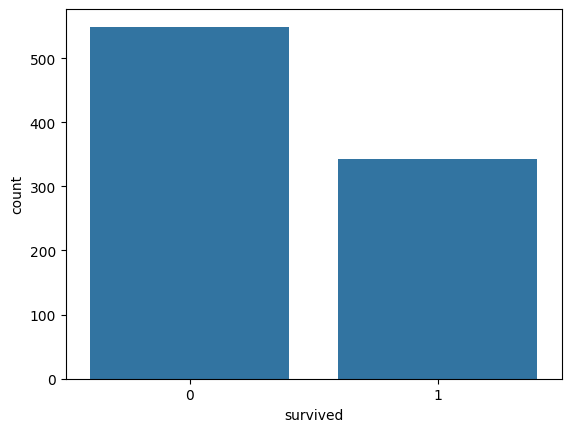

In [16]:
sns.countplot(x='survived', data=train);

In [18]:
train.groupby(['survived','sex'])['survived'].count()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
Name: survived, dtype: int64

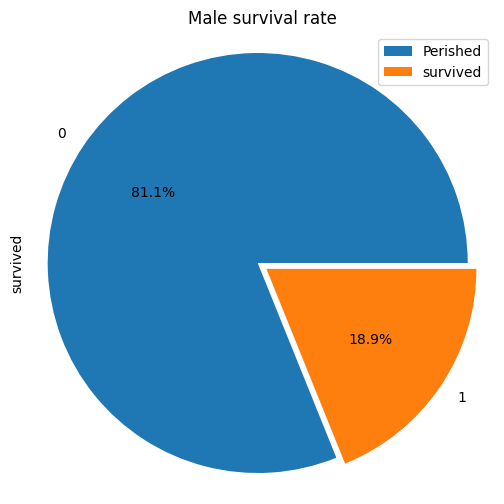

In [24]:
train[train['sex'] == 'male'].survived.groupby(train.survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","survived"])
plt.title("Male survival rate")
plt.show()

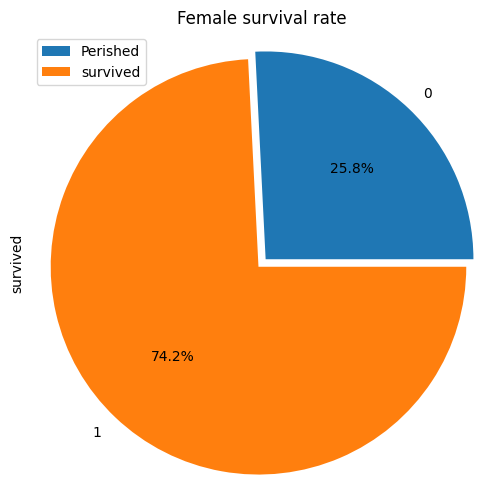

In [25]:
train[train['sex'] == 'female'].survived.groupby(train.survived).count().plot(kind='pie',autopct='%1.1f%%',figsize=(6, 6),explode=[0,0.05])
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(["Perished","survived"])
plt.show()

So now if we choose just Sex as the only feature and say all females survived and all men perished, then we would end up with an accuracy of 78.67%

In [29]:
pd.crosstab(train.pclass, train.survived, margins=True)

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


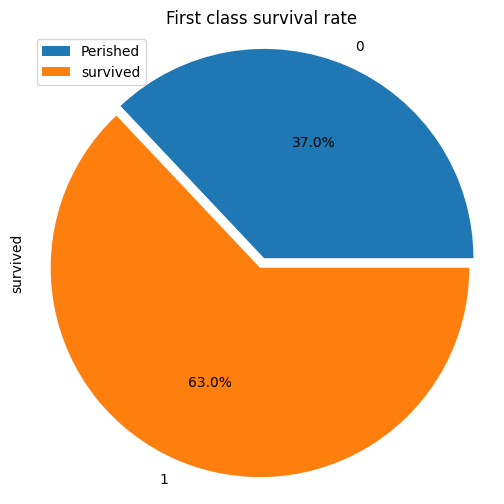

In [30]:
train[train['pclass'] == 1].survived.groupby(train.survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","survived"])
plt.title("First class survival rate")
plt.show()

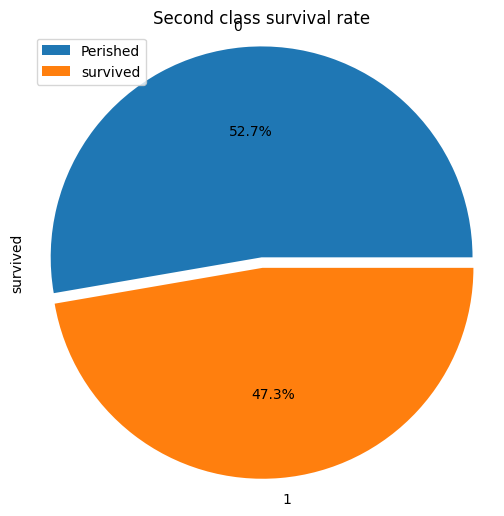

In [31]:
train[train['pclass'] == 2].survived.groupby(train.survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","survived"])
plt.title("Second class survival rate")
plt.show()

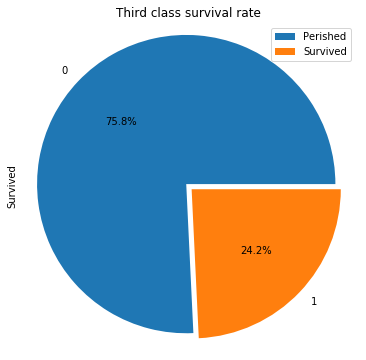

In [14]:
train[train['Pclass'] == 3].Survived.groupby(train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Third class survival rate")
plt.show()

In [33]:
pd.crosstab([train.sex, train.survived], train.pclass, margins=True)

pclass             1    2    3  All
sex    survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

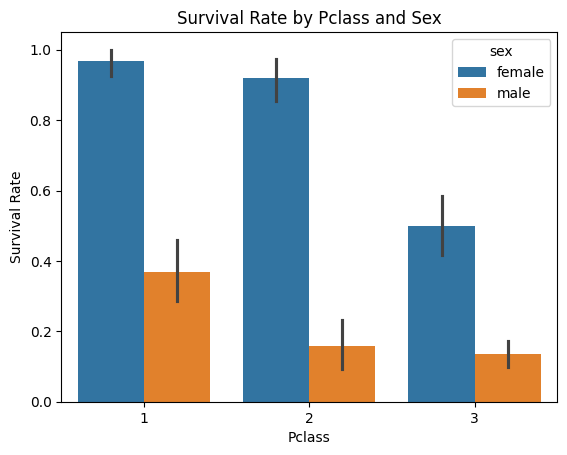

In [36]:
sns.barplot(x='pclass', y='survived', hue='sex', data=train)

# Adding title and labels
plt.title('Survival Rate by Pclass and Sex')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()

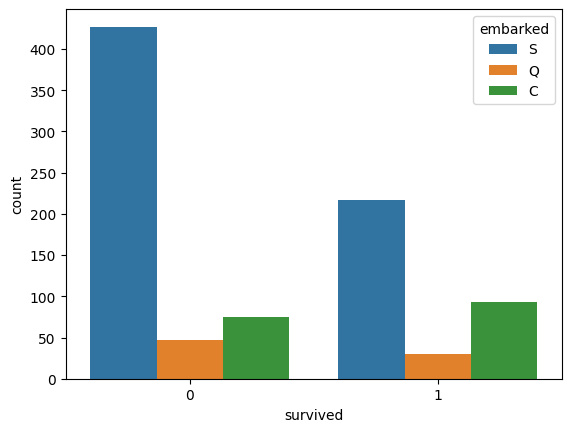

In [37]:
sns.countplot(x='survived', data=train,hue = 'embarked');


In [40]:
pd.crosstab([train.sex, train.survived], [train.sibsp, train.pclass], margins=True)

sibsp              0             1          2         3          4  5  8  All
pclass             1    2    3   1   2   3  1  2   3  1  2   3   3  3  3     
sex    survived                                                              
female 0           1    3   33   2   3  21  0  0   3  0  0   7   4  1  3   81
       1          48   41   48  38  25  17  3  3   4  2  1   1   2  0  0  233
male   0          59   67  235  16  20  35  1  4   7  1  0   4  11  4  4  468
       1          29    9   35  15   7  10  1  1   1  0  0   0   1  0  0  109
All              137  120  351  71  55  83  5  8  15  3  1  12  18  5  7  891

The above crosstab indicates 2 things:
1. Most of the passerenges didn'y had siblings onboard and the majority had atmost 1 sibling onboard

2. Not much of priority was given to the passengers who had sibelings onboard in the rescue operation

In [41]:
pd.crosstab([train.sex, train.survived], [train.parch, train.pclass], margins=True)

parch              0             1           2          3     4     5  6  All
pclass             1    2    3   1   2   3   1   2   3  2  3  1  3  3  3     
sex    survived                                                              
female 0           1    5   35   0   1  13   2   0  17  0  1  0  2  3  1   81
       1          63   40   50  17  17  12  11  11   8  2  1  0  0  1  0  233
male   0          63   81  260  10   7  22   3   3  15  0  1  1  1  1  0  468
       1          36    8   36   4   7   8   5   2   3  0  0  0  0  0  0  109
All              163  134  381  31  32  55  21  16  43  2  3  1  3  5  1  891

The above crosstab indicates 2 things:

1. Most of the passerenges didn't had parents onboard and the majority had atmost 1 parent onboard
2. Not much of priority was given to the passengers who had parents onboard in the rescue operation

In [44]:
# Select only the numeric columns
numeric_columns = train.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)


          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


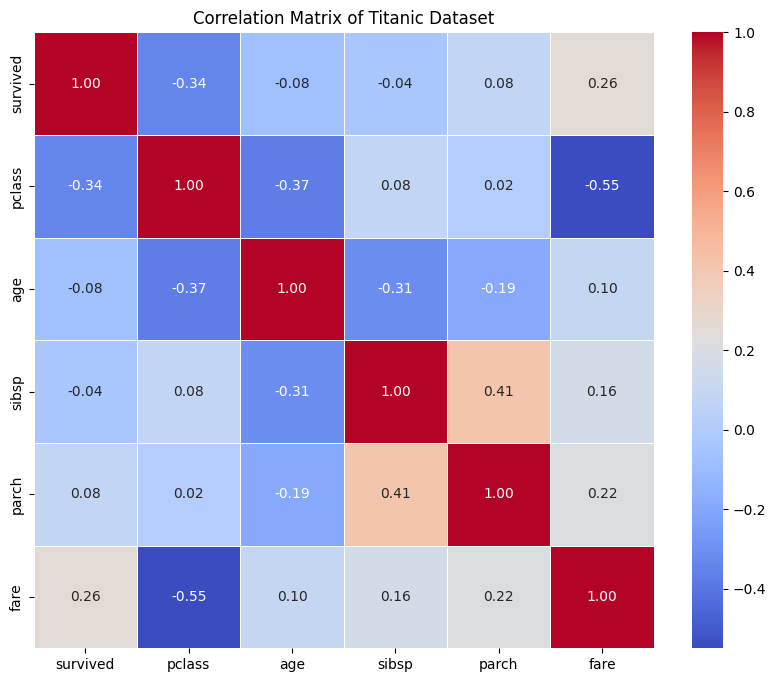

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title to the plot
plt.title('Correlation Matrix of Titanic Dataset')

# Display the plot
plt.show()


The above correlation table indicated below features:

1. The Age was not a priority in the rescue operation similat to the sibelings and parents column as correlation with the target variable is very low
2. There should have been a higher correlation between the Fare and Pclass

In [46]:
train.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


<Axes: xlabel='pclass', ylabel='fare'>

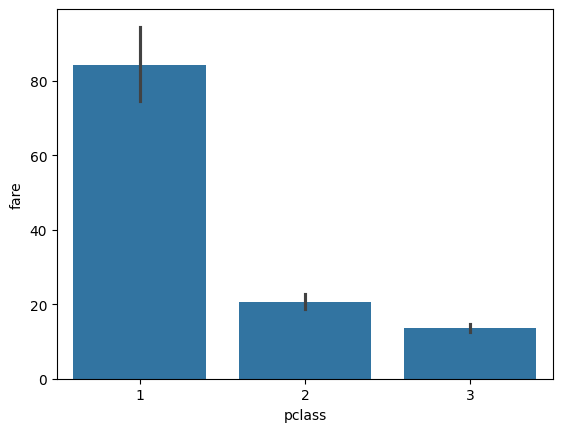

In [47]:
sns.barplot(y = "fare",x = "pclass",data = train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

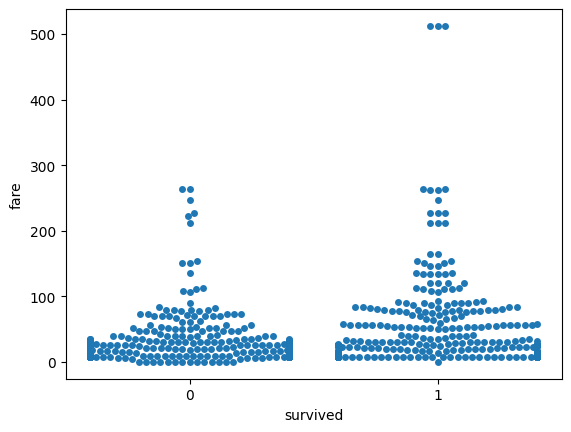

In [48]:
sns.swarmplot(x='survived', y='fare', data=train);

<Axes: xlabel='pclass', ylabel='fare'>

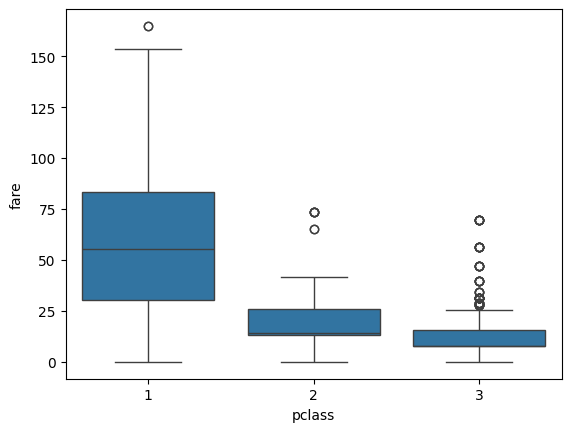

In [49]:
sns.boxplot(y = "fare",x = "pclass",data = train[train["fare"] < 200])

<Axes: xlabel='pclass', ylabel='fare'>

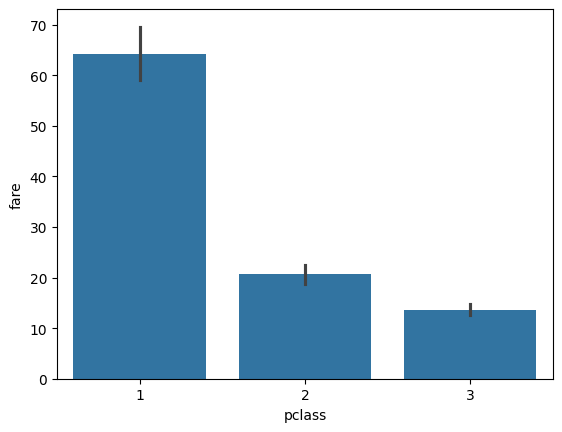

In [50]:
sns.barplot(y = "fare",x = "pclass",data = train[train["fare"] < 200])

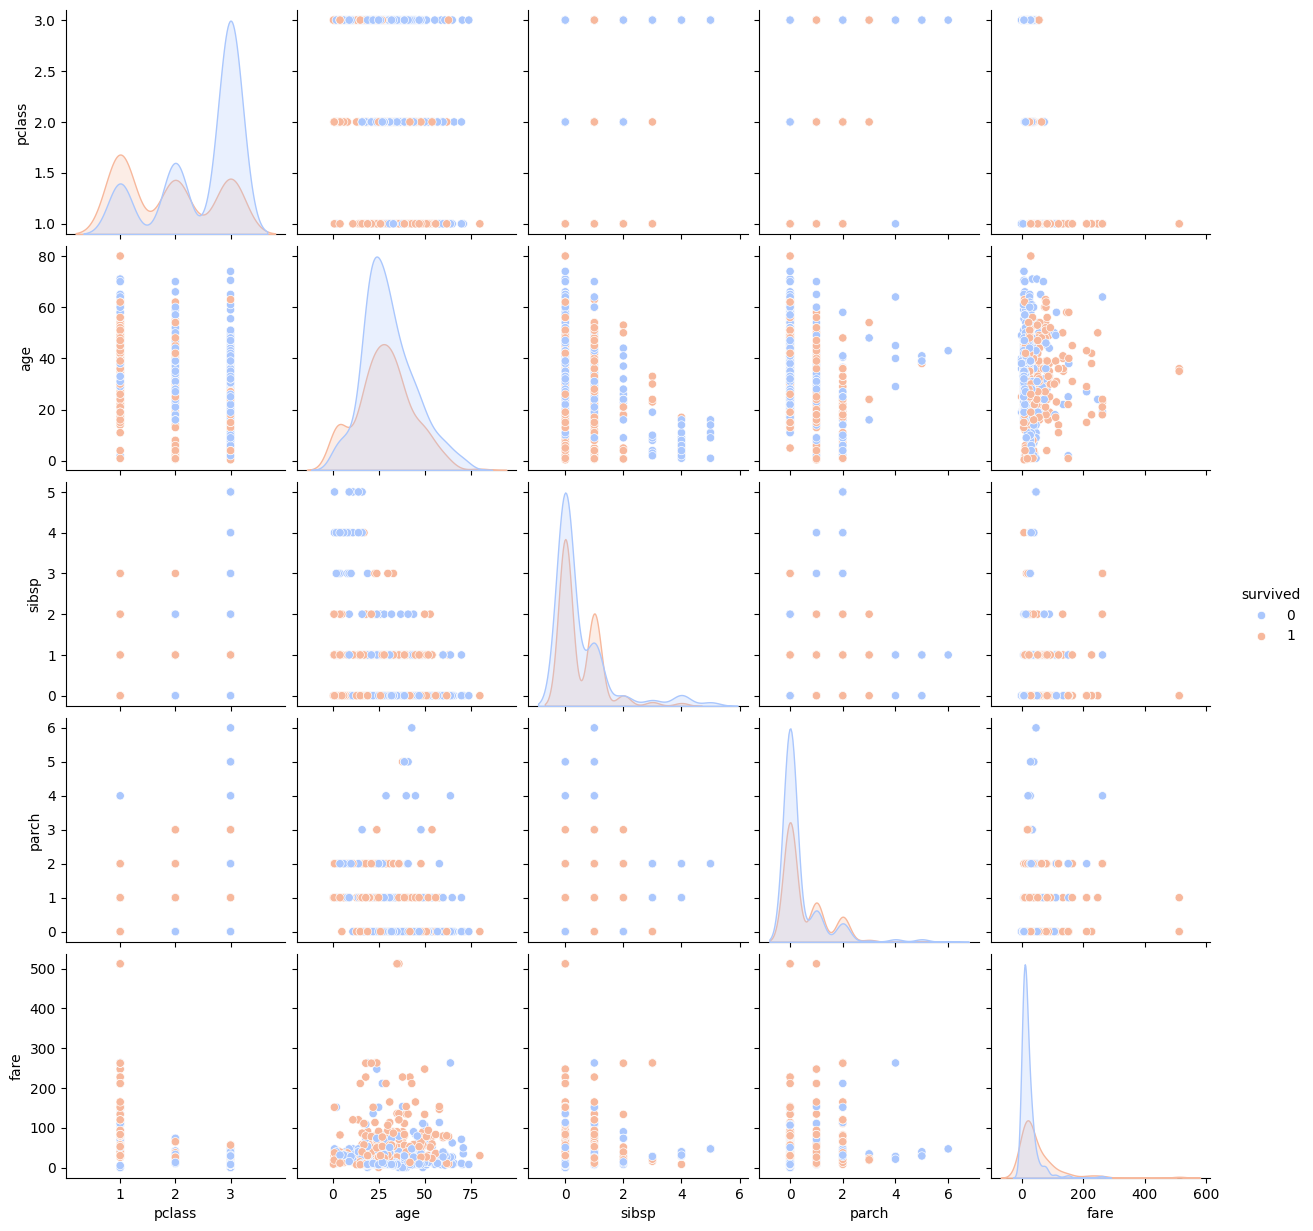

In [54]:
pairplot_data = train.select_dtypes(include=['number']).dropna()

# Create the pairplot
sns.pairplot(pairplot_data, hue="survived", palette="coolwarm", diag_kind="kde")

# Show the plot
plt.show()


Not much information could be extracted from the correlation table

Now lets see how we can handle the missing values of Age

1. By filling with mean value
i.e, train.fillna(value = df.mean())

2. By filling mean value of corresponding Survived category

In [55]:
train.groupby('survived').describe()['age']

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [56]:
train.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
